# Image Segmentation using Adaptive Thresholding

## Project Overview

This project demonstrates **adaptive thresholding**, a powerful technique for image segmentation that handles varying lighting conditions across different regions of an image. Unlike global thresholding which uses a single threshold value for the entire image, adaptive thresholding calculates the threshold for smaller regions, making it ideal for images with non-uniform illumination.

---

## What is Image Segmentation?

**Image segmentation** is the process of partitioning an image into multiple segments or regions to simplify its representation and make it more meaningful for analysis. It's a fundamental task in computer vision with applications in:

- Object detection and recognition
- Medical image analysis
- Autonomous vehicles
- Document scanning and OCR
- Quality inspection in manufacturing

---

## How Adaptive Thresholding Works

Adaptive thresholding calculates different threshold values for different regions of the image:

1. **Divides the image** into smaller neighborhoods (blocks)
2. **Calculates threshold** for each neighborhood based on local pixel values
3. **Applies threshold** to the center pixel of each neighborhood
4. **Adapts to local variations** in lighting and contrast


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


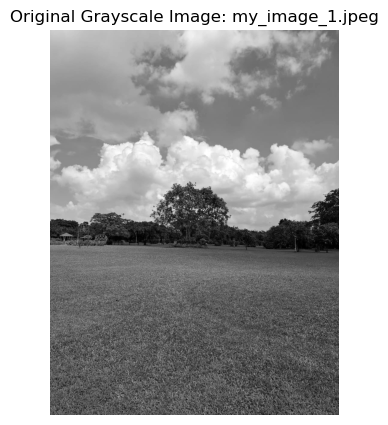

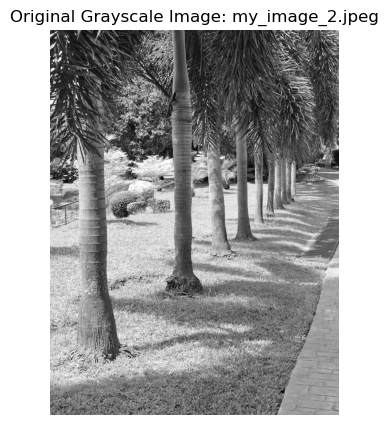

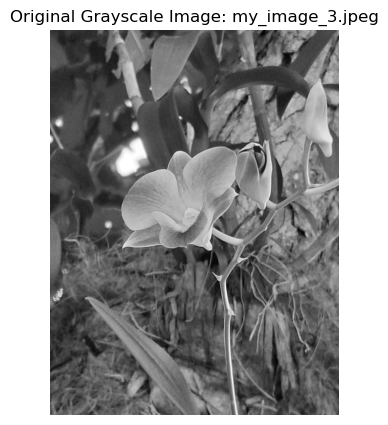

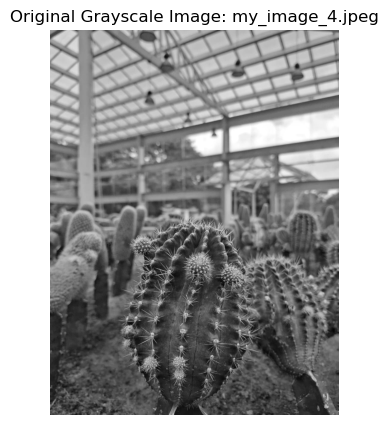

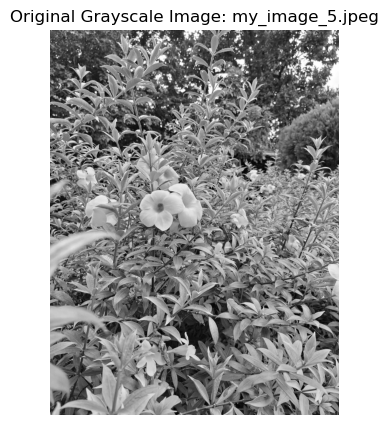

In [2]:
image_folder = "Images"

# Get all images
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display original images
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(5,5))
    plt.imshow(img_gray, cmap='gray')
    plt.title(f"Original Grayscale Image: {img_file}")
    plt.axis('off')
    plt.show()


### Comparing Mean vs Gaussian:

1. **Mean Adaptive**: Sharper edges, may retain more noise
2. **Gaussian Adaptive**: Smoother results, better noise suppression

## Key Parameters

### 1. Block Size (Neighborhood Size)
- Defines the size of the local region used to calculate the threshold
- **Must be an odd number** (e.g., 3, 5, 11, 15)
- **Smaller values**: More sensitive to local variations, may introduce noise
- **Larger values**: Smoother results, may miss fine details
- **In our implementation**: We use `block_size=11`

### 2. Constant C
- A value subtracted from the calculated mean or weighted mean
- **Purpose**: Fine-tune the threshold to improve segmentation
- **Positive C**: Makes threshold more conservative (less white pixels)
- **Negative C**: Makes threshold more aggressive (more white pixels)
- **In our implementation**: We use `C=2`



## Implementation Details

### Step 1: Image Loading and Preprocessing
```python
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
```
- Images are converted to grayscale
- Grayscale simplifies processing by reducing 3 channels (RGB) to 1 channel
- Intensity values range from 0 (black) to 255 (white)

### Step 2: Applying Adaptive Thresholding
```python
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, block_size, C)
```

**Parameters Explained:**
- `img`: Input grayscale image
- `255`: Maximum value assigned to pixels that pass the threshold
- `cv2.ADAPTIVE_THRESH_MEAN_C` or `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Method to calculate threshold
- `cv2.THRESH_BINARY`: Thresholding type (binary segmentation)
- `block_size`: Size of the neighborhood (11 in our case)
- `C`: Constant subtracted from mean (2 in our case)

In [3]:
# Function for adaptive thresholding
def adaptive_threshold(image_path, method='mean', block_size=11, C=2):
    """
    Parameters:
    - method: 'mean' or 'gaussian' for threshold calculation
    - block_size: size of the local region (must be odd)
    - C: constant subtracted from mean or weighted sum
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if method == 'mean':
        thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY, block_size, C)
    elif method == 'gaussian':
        thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, block_size, C)
    else:
        raise ValueError("Method must be 'mean' or 'gaussian'")

    return img, thresh


## Results Interpretation

### What to Look For:

1. **Edge Preservation**: Well-defined boundaries between objects
2. **Noise Handling**: Minimal salt-and-pepper noise in uniform regions
3. **Detail Retention**: Fine structures should remain visible
4. **Contrast Enhancement**: Clear separation between foreground and background

---

## Tips for Best Results

1. **Experiment with block_size**: Start with 11, adjust based on image scale
2. **Tune the C parameter**: Small adjustments can significantly impact results
3. **Preprocess images**: Consider denoising if image is very noisy
4. **Choose the right method**: Gaussian for natural images, Mean for documents
5. **Consider image resolution**: Higher resolution may need larger block sizes

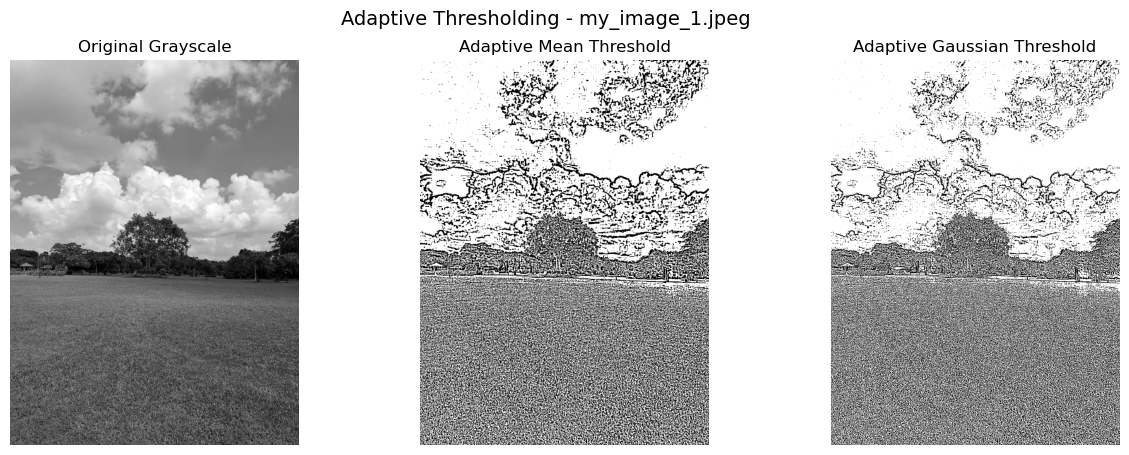

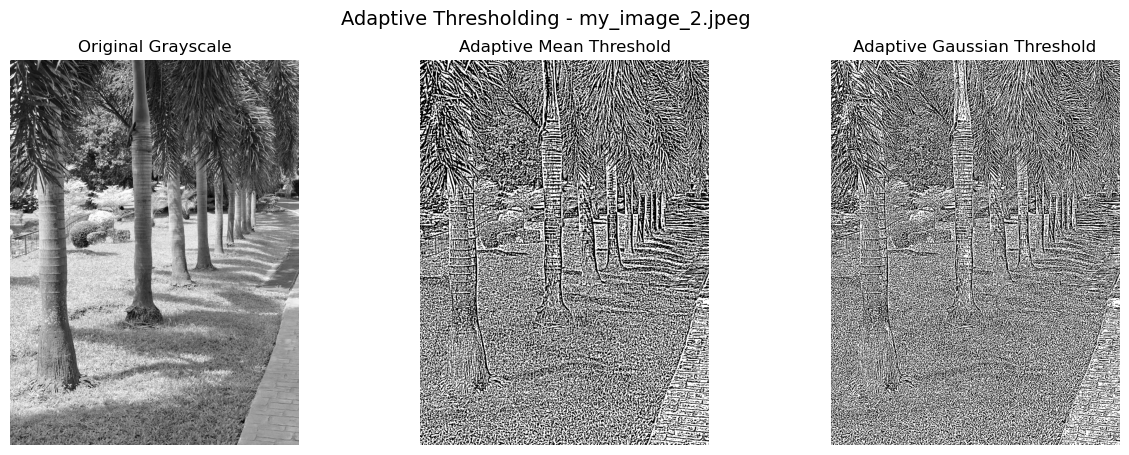

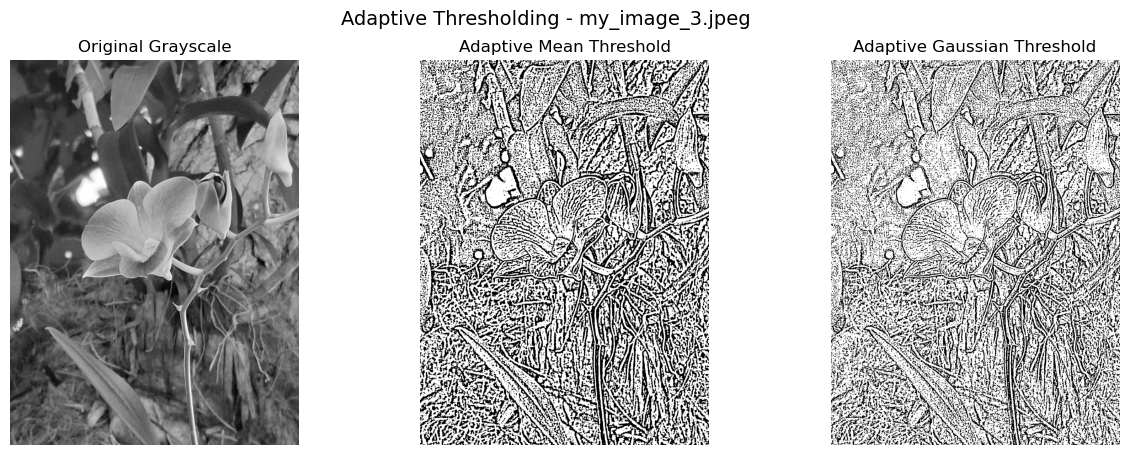

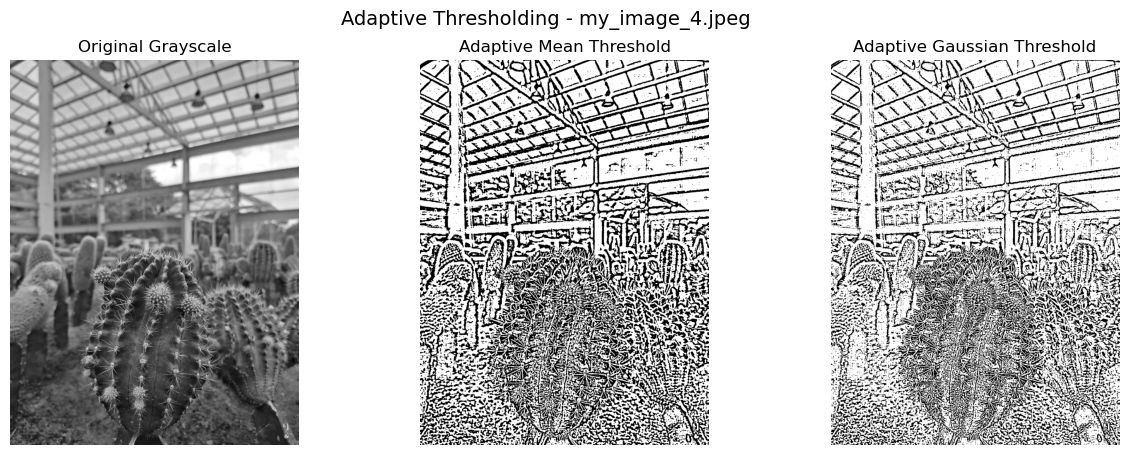

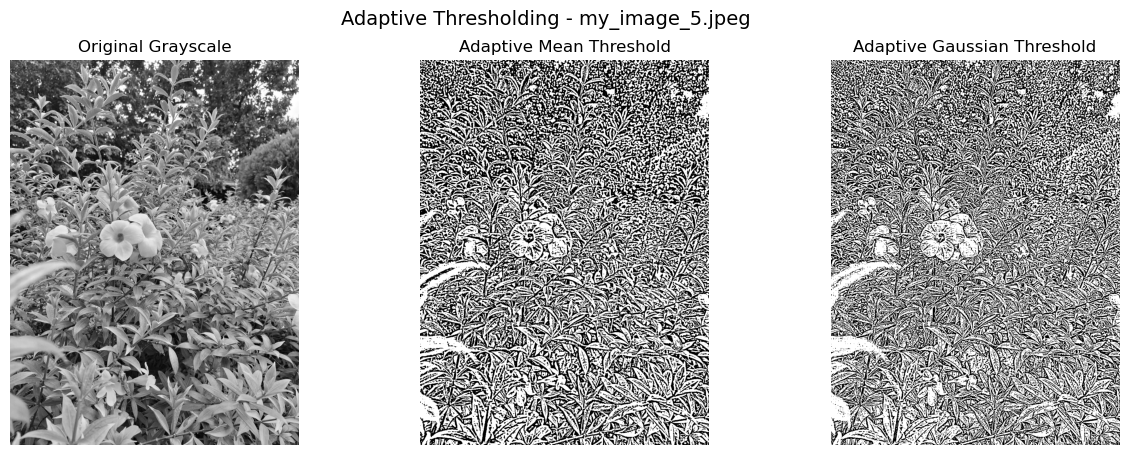

In [4]:
# Apply and visualize adaptive thresholding
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)

    # Mean Adaptive Threshold
    gray, thresh_mean = adaptive_threshold(img_path, method='mean', block_size=11, C=2)

    # Gaussian Adaptive Threshold
    _, thresh_gaussian = adaptive_threshold(img_path, method='gaussian', block_size=11, C=2)

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(thresh_mean, cmap='gray')
    plt.title("Adaptive Mean Threshold")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(thresh_gaussian, cmap='gray')
    plt.title("Adaptive Gaussian Threshold")
    plt.axis('off')

    plt.suptitle(f"Adaptive Thresholding - {img_file}", fontsize=14)
    plt.show()


## Applications

1. **Document Scanning**: Separating text from background in varying lighting
2. **Barcode Reading**: Extracting barcode patterns from images
3. **License Plate Recognition**: Segmenting characters from plates
4. **Medical Imaging**: Identifying tissue boundaries in scans
5. **Quality Control**: Detecting defects in manufactured products

---

## Advantages of Adaptive Thresholding

1. **Handles non-uniform illumination** effectively  
2. **No need for manual threshold selection**  
3. **Works well with varying contrast** across image  
4. **Computationally efficient**  
5. **Robust to lighting variations**

---

## Limitations

1. **Sensitive to block size selection**: Wrong size can lead to poor results  
2. **May introduce artifacts** at block boundaries  
3. **Not ideal for images** with extreme noise  
4. **Computational cost increases** with smaller block sizes

## Conclusion

Adaptive thresholding is a versatile and powerful technique for image segmentation, especially when dealing with images that have varying lighting conditions. By understanding the parameters and methods, you can effectively segment a wide range of images for various computer vision applications.